# M. Divo Trinanda (09011381722103)
# Implementasi Neural Network Dalam Mendeteksi Penipuan Kartu Kredit

Munculnya kartu kredit dan peningkatan fungsinya tidak hanya memberi orang lebih banyak kenyamanan pribadi, tetapi juga menarik minat karakter jahat. Penipuan kartu kredit (J.W.Goethe) merupakan sebuah aktivitas akun yang tidak sah yang dilakukan oleh seseorang yang tidak bertanggung jawab. Deteksi penipuan diberikan satu set transaksi kartu kredit proses mengidentifikasi transaksi-transaksi yang curang misalnya mengklasifikasikan transaksi menjadi dua kelas: kelas normal dan kelas transaksi penipuan. Dari lalu lintas data yang tinggi dari 400.000 transaksi per hari, pengurangan 2,5% dari penipuan memicu penghematan satu juta dolar per tahun (J.W.Goethe).


# Dataset

Dataset ini berisi mengenai transaksi yang dilakukan dengan kartu kredit pada September 2013 oleh pemegang kartu di Eropa. Dataset ini menyajikan transaksi yang terjadi dalam dua hari, di mana kami memiliki 492 penipuan dari 284.807 transaksi. Dataset sangat tidak seimbang, kelas positif (penipuan) menyumbang 0,172% dari semua transaksi.

Dataset ini hanya berisi variabel input numerik yang merupakan hasil dari transformasi PCA. Sayangnya, karena masalah kerahasiaan, kami tidak dapat menyediakan fitur asli dan informasi latar belakang lainnya tentang data. Fitur V1, V2, ... V28 adalah komponen utama yang diperoleh dengan PCA, satu-satunya fitur yang belum ditransformasikan dengan PCA adalah ‘Waktu’ dan ‘Jumlah’. Fitur ‘Waktu’ berisi detik yang berlalu antara setiap transaksi dan transaksi pertama dalam dataset. Fitur ‘Jumlah’ adalah Jumlah transaksi, fitur ini dapat digunakan sebagai contoh pembelajaran yang bergantung pada biaya. Fitur ‘Kelas’ adalah variabel respons dan dibutuhkan nilai 1 jika terjadi penipuan dan 0 sebaliknya

Pada percobaan ini kami melakukan dua kali training yang pertama tidak menggunakan SMOTE sedangkan yang kedua dengan menggunakan SMOTE. SMOTE sendiri biasanya digunakan pada data yang unbalace yaitu data yang perbandingannya itu melebihi dari 1:3

# Import Libraries

In [85]:
import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt
import seaborn as sns

### Library Numpy 
berfungsi untuk mengolah data dalam bentuk angka (array)
### Library Pandas
Berfungsi untuk membaca file dataset dalam bentuk .CSV
### Library Keras
Keras adalah high-level neural network API yang dikembangkan dengan Python dengan fokus tujuan untuk mempercepat proses riset atau percobaan
### Library Matplotlib 
berfungsi untuk membantu visualisasi dataset sehingga memudahkan untuk dipahami
### Library Seaborn
sama seperti Matplotlib,yakni berfungsi untuk membantu visualisasi dataset

# Membaca Data

Dataset ini memiliki 29 kolom dan 1025 baris dengan 28 kolom sebagai features dan 1 kolom (Class) sebagai label yang memiliki nilai 0 (normal) dan 1 (penipuan) 

In [86]:
df=pd.read_csv('creditcard.csv')

# Menampilkan Lima baris pertama dari data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Telusuri Data

In [87]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Transaksi normal sebanyak 284315 kali sedangkan transaksi dengan penipuan sebanyak 492 kali

- Perintah diatas berfungsi untuk melihat jumlah data yang berlabel 1 (penipuan) yakni sebanyak 492 sedangkan data yang berlabel 0 (normal) sebanyak 284.315.
- Sedangkan pada perintah dibawah ini berfugsi untuk menampilkan jumlah data yang dihasilkan pada perintah diatas dalam bentuk Bar menggunakan bantuan library seaborn 

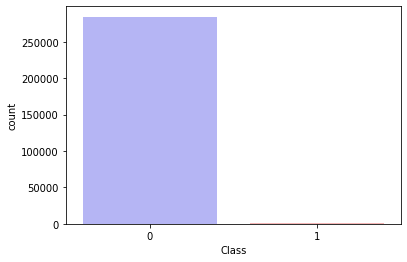

In [88]:
sns.countplot(x="Class", data=df, palette="bwr")
plt.show()

Dari data ini kami memiliki 492 penipuan dan 284315 transaksi normal dari 284.807 transaksi. Dataset ini sangat tidak seimbang dikarena perbandingan dari penipuan dengan transaksi normal yaitu 1:577

# Mengecek apakah ada data kosong
Setelah kita menimport dataset ada baiknya kita terlebih dahulu melakukan pegecekaan terhadap dataset kita, apakah data tersebih sudah bersih atau masih ada data kosong.

In [89]:
df.isnull().any().sum()

0

## Seberapa banyak jumlah uang yang digunakan dalam kelas transaksi yang berbeda?

Untuk mengecek peredaran uang yang berada dalam beberapa kelas transaksi

In [90]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [91]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [92]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## Mari kita memiliki representasi yang lebih grafis:

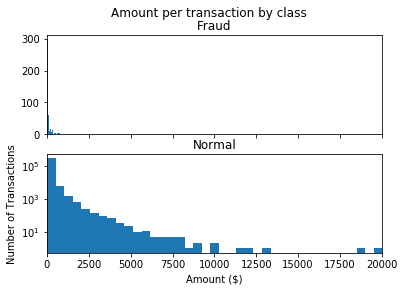

In [93]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

## Apakah transaksi penipuan lebih sering terjadi selama waktu tertentu?

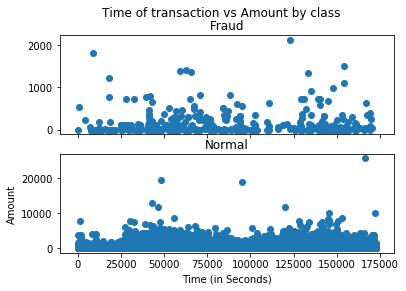

In [94]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Dari grafik diatas dapat disimpulkan jika waktu transaksi tidak terlalu penting atau berpengaruh dalam penipuan ini.

# Menyiapkan data

Pertama, mari kita lepaskan kolom Waktu (tidak akan menggunakannya) dan gunakan StandardScaler scikit pada Jumlah. Scaler menghapus nilai rata-rata dan menskalakan nilai ke varians unit:

In [95]:
from sklearn.preprocessing import StandardScaler
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

Pelatihan Autoencoder kami akan sedikit berbeda dari yang biasa kami lakukan. Katakanlah Anda memiliki dataset yang berisi banyak transaksi tidak curang. Anda ingin mendeteksi adanya anomali pada transaksi baru. Kami akan menciptakan situasi ini dengan hanya melatih model kami pada transaksi normal. Pemesanan kelas yang benar pada set tes akan memberi kita cara untuk mengevaluasi kinerja model kami. Kami akan memesan 20% dari data kami untuk pengujian

# Menentukan Features dan Labels
Labelnya adalah Class sedangkan untuk featuresnya adalah kolom selain class. Pada percobaan kali ini Features = X dan Label = y

In [96]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

# Data Split

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

Pada tahap ini kita membuat file test berukuran 20 % dari jumlah keseluruhan data yang tersedia. Setelah itu kita membuat model NN dengan 50 hiden layer pertama dan 50 hiden layer kedua.selain itu kita membuat output layer 1 (iya atau tidak) 

# Deep Learning Tanpa SMOTE

In [98]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential([
    Dense(units=18, input_dim = 29,activation='relu'),
    Dense(units=26,activation='relu'),
    Dropout(0.5),
    Dense(22,activation='relu'),
    Dense(22,activation='relu'),
    Dense(1,activation='sigmoid'),
])

Mari kita latih model dengan 100 epochs dan ukuran batch 100 sampel dan simpan model berkinerja terbaik ke sebuah file. 

In [99]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
acc_training = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=100)
acc_testing  = model.evaluate(X_test, y_test) 

Train on 227845 samples, validate on 56962 samples
Epoch 1/100
227845/227845 [==============================] - 6s 27us/step - loss: 0.0183 - accuracy: 0.9960 - val_loss: 0.0044 - val_accuracy: 0.9994
Epoch 2/100
227845/227845 [==============================] - 8s 37us/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 3/100
227845/227845 [==============================] - 9s 39us/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 4/100
227845/227845 [==============================] - 6s 26us/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 5/100
227845/227845 [==============================] - 6s 26us/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 6/100
227845/227845 [==============================] - 6s 26us/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 7/100
227845/227845 [======================

In [100]:
print('akurasinya adalah {:.2f}%\nTest Loss: {:.2f}%'.format(acc_testing[1]*100,100-acc_testing[1]*100))

akurasinya adalah 99.93%
Test Loss: 0.07%


In [101]:
acc_training.history

{'val_loss': [0.0044469673190837816,
  0.004027516257135663,
  0.0037523012511913745,
  0.003380422272068938,
  0.0034480009499058524,
  0.003477081707772175,
  0.0037416003110380814,
  0.003484249000885357,
  0.0037326541019841405,
  0.0034052316972827275,
  0.003519342340118595,
  0.003844103029952596,
  0.0035144099435469663,
  0.0036773433954228915,
  0.0038499041037447492,
  0.004056946840746532,
  0.0036747529988004645,
  0.003745238744749253,
  0.0039047682377039324,
  0.003985775996242745,
  0.004583678994761818,
  0.004081478077896145,
  0.004763786050368164,
  0.004356376759664727,
  0.004278933197154409,
  0.004913999329227712,
  0.0042872822703661105,
  0.004232400799227292,
  0.004619514035481669,
  0.004750163310958588,
  0.0046493428712860545,
  0.004962740737241322,
  0.004800401250454724,
  0.004778220795355079,
  0.005771098597994518,
  0.005105489539924878,
  0.005534731261801085,
  0.006015428342814106,
  0.00551773754940801,
  0.006648191136191646,
  0.005997269052

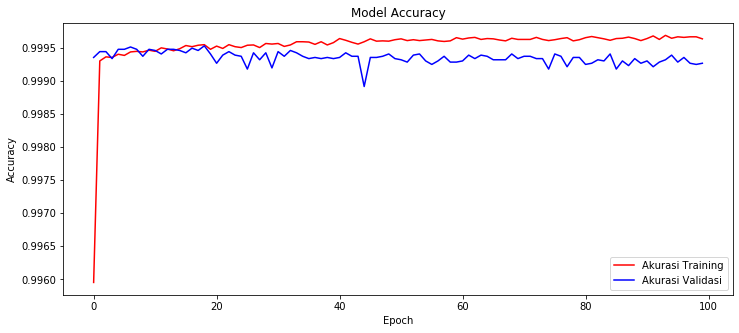

In [102]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

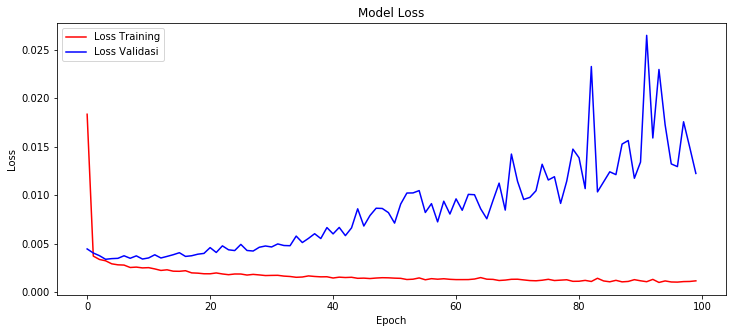

In [103]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

Kesalahan rekonstruksi pada data pelatihan dan pengujian ini tampaknya bagus. Apakah cukup rendah? Mari kita lihat lebih dekat distribusi kesalahan:

# Matriks Confusion
Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining. Rumus ini melakukan perhitungan dengan 4 keluaran, yaitu: recall, precision, acuraccy dan error rate.

Confusion Matriks memiliki 4 instilah yaitu

    -True Positif
    -False Positif
    -False Negative
    -True Negativ
    
    
1. True Positives (TP): True positif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi juga 1 (Benar)

2. Negatif Benar (TN): True Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan prediksi juga 0 (Salah

3. Salah Positif (FP): False positif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan yang diprediksi adalah 1 (Benar).

4. Negatif Palsu (FN): False Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi adalah 0 (Salah).

BENTUK CONFUSION MATRIX DARI MODEL TRAINING

In [104]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
training_cm = confusion_matrix(y_test, y_pred.round())
print(training_cm)

[[56844    14]
 [   28    76]]


BENTUK CONFUSION MATRIX DARI MODEL TESTING

In [105]:
y_pred = model.predict(X)
testing_cm = confusion_matrix(y, y_pred.round())
print(testing_cm)

[[284294     21]
 [    87    405]]


# Deep Learning dengan SMOTE

Dikarenakan dataset yang digunakan tidak balance maka diperlukan library SMOTE. SMOTE merupakan metode yang populer diterapkan dalam rangka menangani ketidak seimbangan kelas. Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara membuat instance baru dari minority class dengan pembentukan convex kombanasi dari instances yang saling berdekatan

In [57]:
from imblearn.over_sampling import SMOTE

In [83]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

SMOTE merupakan library yang digunakan untuk menyeimbangkan data

In [59]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.5)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
acc_training = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=100)
acc_testing  = model.evaluate(X_test, y_test) 

Train on 284315 samples, validate on 284315 samples
Epoch 1/100
284315/284315 [==============================] - 13s 45us/step - loss: 0.0481 - accuracy: 0.9865 - val_loss: 0.0252 - val_accuracy: 0.9913
Epoch 2/100
284315/284315 [==============================] - 9s 32us/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0150 - val_accuracy: 0.9952
Epoch 3/100
284315/284315 [==============================] - 10s 35us/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0118 - val_accuracy: 0.9964
Epoch 4/100
284315/284315 [==============================] - 9s 33us/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 0.0111 - val_accuracy: 0.9968
Epoch 5/100
284315/284315 [==============================] - 9s 33us/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0088 - val_accuracy: 0.9977
Epoch 6/100
284315/284315 [==============================] - 10s 34us/step - loss: 0.0071 - accuracy: 0.9983 - val_loss: 0.0088 - val_accuracy: 0.9977
Epoch 7/100
284315/284315 [==================

In [60]:
print('akurasinya adalah {:.2f}%\nTest Loss: {:.2f}%'.format(acc_testing[1]*100,100-acc_testing[1]*100))

akurasinya adalah 99.91%
Test Loss: 0.09%


In [61]:
acc_training.history

{'val_loss': [0.025161276762817354,
  0.014981831580623883,
  0.011753449501511448,
  0.011103832456586762,
  0.008795105347824355,
  0.008839830666512857,
  0.006326638182895646,
  0.006585601935808988,
  0.0065688086662942765,
  0.007111894242561547,
  0.005289444838528309,
  0.004600959007810946,
  0.00657720065374269,
  0.005263601597566459,
  0.005134603766842993,
  0.0048947406718555355,
  0.004333054068222715,
  0.00486728261326238,
  0.005972805521055799,
  0.005983865832690562,
  0.004772963834898999,
  0.004416497577934274,
  0.0077587911868994,
  0.004543659075192311,
  0.00449985862408089,
  0.004541969001345245,
  0.0038928119296812035,
  0.0048445998367099416,
  0.005727391042431893,
  0.004411134084474574,
  0.0042042005039748245,
  0.004538527204375622,
  0.004395497697672976,
  0.0042993596927341175,
  0.004944098719641151,
  0.004203684579810848,
  0.0043124103910941024,
  0.004148738317264092,
  0.00429725566423533,
  0.005200959990899497,
  0.005590884606454174,
  0

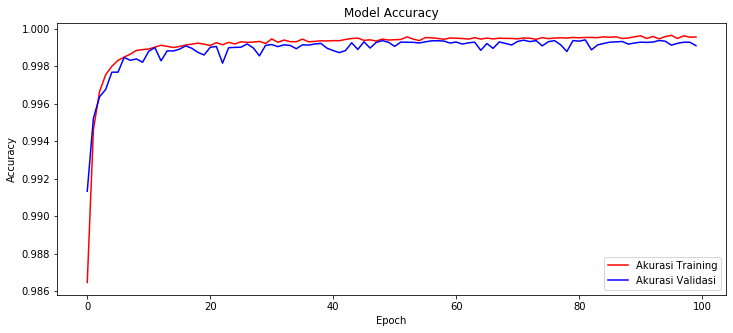

In [62]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

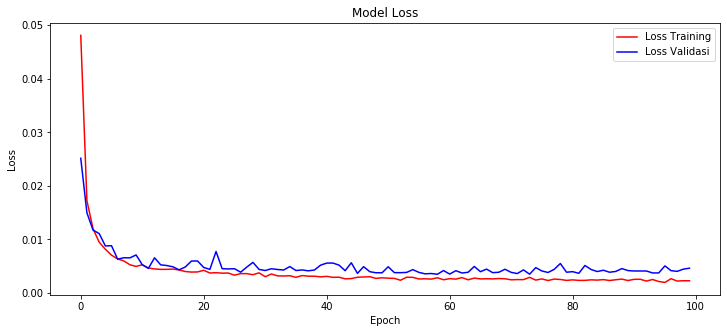

In [63]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

In [64]:
training_predicted = model.predict(X_train)
testing_predicted = model.predict(X_test)

In [65]:
training_predicted.round()

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

BENTUK CONFUSION MATRIX DARI MODEL TRAINING

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
training_cm = confusion_matrix(y_test, y_pred.round())
print(training_cm)

[[142178    191]
 [    65 141881]]


BENTUK CONFUSION MATRIX DARI MODEL TESTING

In [67]:
y_pred = model.predict(X)
testing_cm = confusion_matrix(y, y_pred.round())
print(testing_cm)

[[284041    274]
 [     2    490]]


In [68]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9990995902432162
Specificity training 0.9995420793823003
Sensitivity training 0.9986584158068119
Precision training 0.9995430355096561
F1 Score training 0.9991005298441388


In [69]:
#Testing
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.999030922695018
Specificity testing 0.9959349593495935
Sensitivity testing 0.9990362801821923
Precision testing 0.9999929588125741
F1 Score testing 0.9995143905777696


## Mengecek berapa banyak data yang digunakan untuk testing dan training

In [84]:
print ('training instances of data:' , len(y_train)) 
print ('training instances of fraud' , np.count_nonzero(y_train))
print ('testing instances of data:' , len(y_test))
print ('testing instances of fraud:' , np.count_nonzero(y_test))

training instances of data: 454904
training instances of fraud 227549
testing instances of data: 113726
testing instances of fraud: 56766


# Kesimpulan
Dari kedua percobaan diatas maka dapat disimpulkan jika pada percobaan pertama yang tidak menggunakan SMOTE grafik yang dihasilkan tidak terlalu baik walupun akurasinya sudah baik sedangkan jika menggunakan SMOTE grafiknya akan menjadi lebih bagus

# Referensi 
- Paper : Neural Data Mining Untuk Penipuan Kartu Kredit
- dataset : https://www.kaggle.com/ronitf/heart-disease-uci    